# Customer Shopping Trends: EDA in Jupyter

This notebook explores the cleaned dataset for key trends and correlations.
Load data and compute insights to reference in the Streamlit dashboard.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load cleaned data (adjust path if needed – relative from python_analysis/)
df = pd.read_csv('../data/cleaned_shopping_data.csv')
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nData Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Shape: (3900, 19)

First 5 rows:
   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

  Payment Metho

Trend: Average Purchase by Category
Category
Footwear       60.255426
Clothing       60.025331
Accessories    59.838710
Outerwear      57.172840
Name: Purchase Amount (USD), dtype: float64


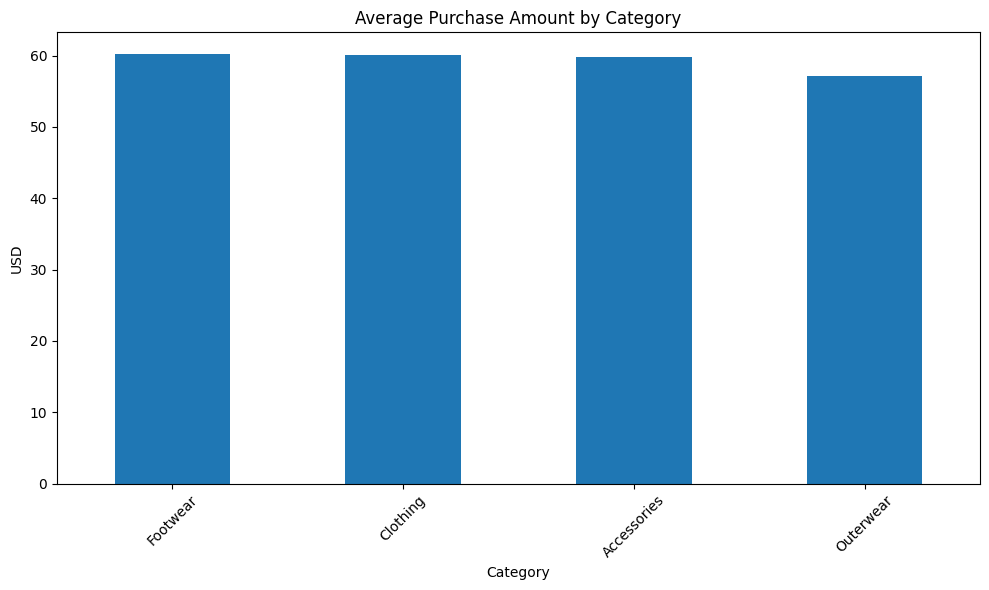


Trend: Purchase Frequency Distribution
Frequency of Purchases
Every 3 Months    584
Annually          572
Quarterly         563
Monthly           553
Bi-Weekly         547
Fortnightly       542
Weekly            539
Name: count, dtype: int64


In [11]:
# Trend 1: Average Purchase Amount by Category
if 'Category' in df.columns and 'Purchase Amount (USD)' in df.columns:
    avg_by_category = df.groupby('Category')['Purchase Amount (USD)'].mean().sort_values(ascending=False)
    print("Trend: Average Purchase by Category")
    print(avg_by_category)
    # Visualize (optional)
    plt.figure(figsize=(10,6))
    avg_by_category.plot(kind='bar')
    plt.title('Average Purchase Amount by Category')
    plt.ylabel('USD')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('../visuals/avg_purchase_by_category.png')  # Save to visuals/
    plt.show()

# Trend 2: Purchase Frequency Distribution
if 'Frequency of Purchases' in df.columns:
    freq_dist = df['Frequency of Purchases'].value_counts()
    print("\nTrend: Purchase Frequency Distribution")
    print(freq_dist)

Key Correlations (Matrix):
                            Age  Purchase Amount (USD)  Review Rating  \
Age                    1.000000              -0.010424      -0.021949   
Purchase Amount (USD) -0.010424               1.000000       0.030776   
Review Rating         -0.021949               0.030776       1.000000   
Previous Purchases     0.040445               0.008063       0.004229   

                       Previous Purchases  
Age                              0.040445  
Purchase Amount (USD)            0.008063  
Review Rating                    0.004229  
Previous Purchases               1.000000  


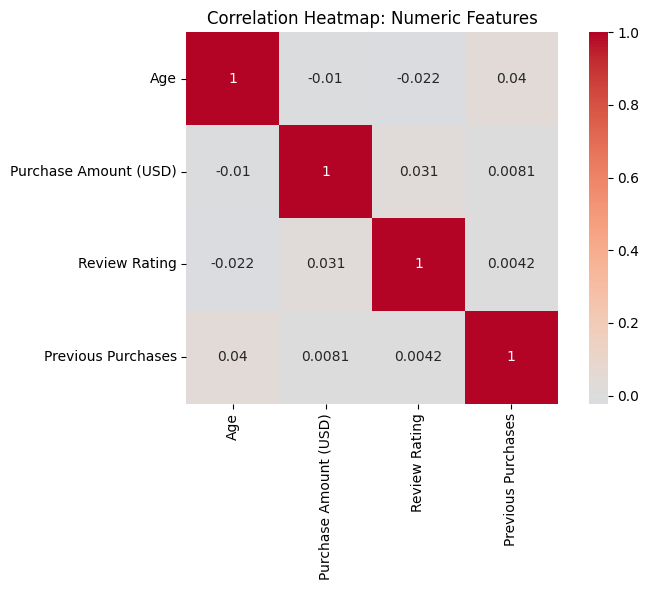


Key Correlation Insights:
- Positive correlation between Previous Purchases and Purchase Amount: 0.01 (loyal customers spend more)
- Weak correlation between Age and Purchase Amount: -0.01 (spending similar across ages)


In [12]:
# Correlation Analysis (numeric columns only)
numeric_cols = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']
corr_df = df[numeric_cols].corr()  # Or df.corr(numeric_only=True) in Pandas 2.0+
print("Key Correlations (Matrix):")
print(corr_df)

# Visualize Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Correlation Heatmap: Numeric Features')
plt.tight_layout()
plt.savefig('../visuals/correlation_heatmap.png')  # Save for portfolio
plt.show()

# Highlight Key Insights
print("\nKey Correlation Insights:")
if 'Previous Purchases' in corr_df.columns and 'Purchase Amount (USD)' in corr_df.columns:
    corr_prev_purchase = corr_df.loc['Previous Purchases', 'Purchase Amount (USD)']
    print(f"- Positive correlation between Previous Purchases and Purchase Amount: {corr_prev_purchase:.2f} (loyal customers spend more)")
if 'Age' in corr_df.columns and 'Purchase Amount (USD)' in corr_df.columns:
    corr_age_purchase = corr_df.loc['Age', 'Purchase Amount (USD)']
    print(f"- Weak correlation between Age and Purchase Amount: {corr_age_purchase:.2f} (spending similar across ages)")

In [13]:
# Trend 3: Discount Impact on Average Purchase
if 'Discount Applied' in df.columns and 'Purchase Amount (USD)' in df.columns:
    discount_impact = df.groupby('Discount Applied')['Purchase Amount (USD)'].mean()
    print("\nTrend: Average Purchase with/without Discount")
    print(discount_impact)
    
    # FIXED: Safer calculation with balanced parentheses
    yes_avg = discount_impact.get('Yes', 0)
    no_avg = discount_impact.get('No', 0) or 1  # Avoid division by zero; default to 1 if missing
    discount_boost_pct = ((yes_avg / no_avg) - 1) * 100 if no_avg != 0 else 0
    print(f"- Discount Boost: {discount_boost_pct:.1f}% higher with discounts")

# FIXED: Insights summary dictionary - Balanced all parentheses and ensured variables exist
# Define variables if not already (from previous cells; fallback to safe defaults)
avg_by_category_safe = locals().get('avg_by_category', pd.Series())  # From Cell 3
corr_prev_safe = locals().get('corr_prev_purchase', 0)  # From Cell 4
corr_age_safe = locals().get('corr_age_purchase', 0)    # From Cell 4
discount_boost_safe = discount_boost_pct if 'discount_boost_pct' in locals() else 0  # From above

insights = {
    'avg_by_category': avg_by_category_safe.to_dict() if isinstance(avg_by_category_safe, pd.Series) else {},
    'key_corr_prev': corr_prev_safe,
    'key_corr_age': corr_age_safe,
    'discount_boost': discount_boost_safe
}
print("\nSummary Insights for Streamlit:")
print(insights)


Trend: Average Purchase with/without Discount
Discount Applied
No     60.130454
Yes    59.279070
Name: Purchase Amount (USD), dtype: float64
- Discount Boost: -1.4% higher with discounts

Summary Insights for Streamlit:
{'avg_by_category': {'Footwear': 60.25542570951586, 'Clothing': 60.025331030512376, 'Accessories': 59.83870967741935, 'Outerwear': 57.17283950617284}, 'key_corr_prev': np.float64(0.008063412270587633), 'key_corr_age': np.float64(-0.010423647378686554), 'discount_boost': np.float64(-1.4158957933543381)}
